# 작업환경 세팅

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [25]:
!pip3 --version            # pip3 버전 확인

pip 21.2.4 from C:\Anaconda3\lib\site-packages\pip (python 3.9)



In [24]:
# 최신버전 아닐경우 설치하는 코드
#!pip3 install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.3 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


# 데이터 로드

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()             # 데이터 다운로드

In [3]:
# 데이터 로드

import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path )

# 데이터 구조 훑어보기

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [62]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


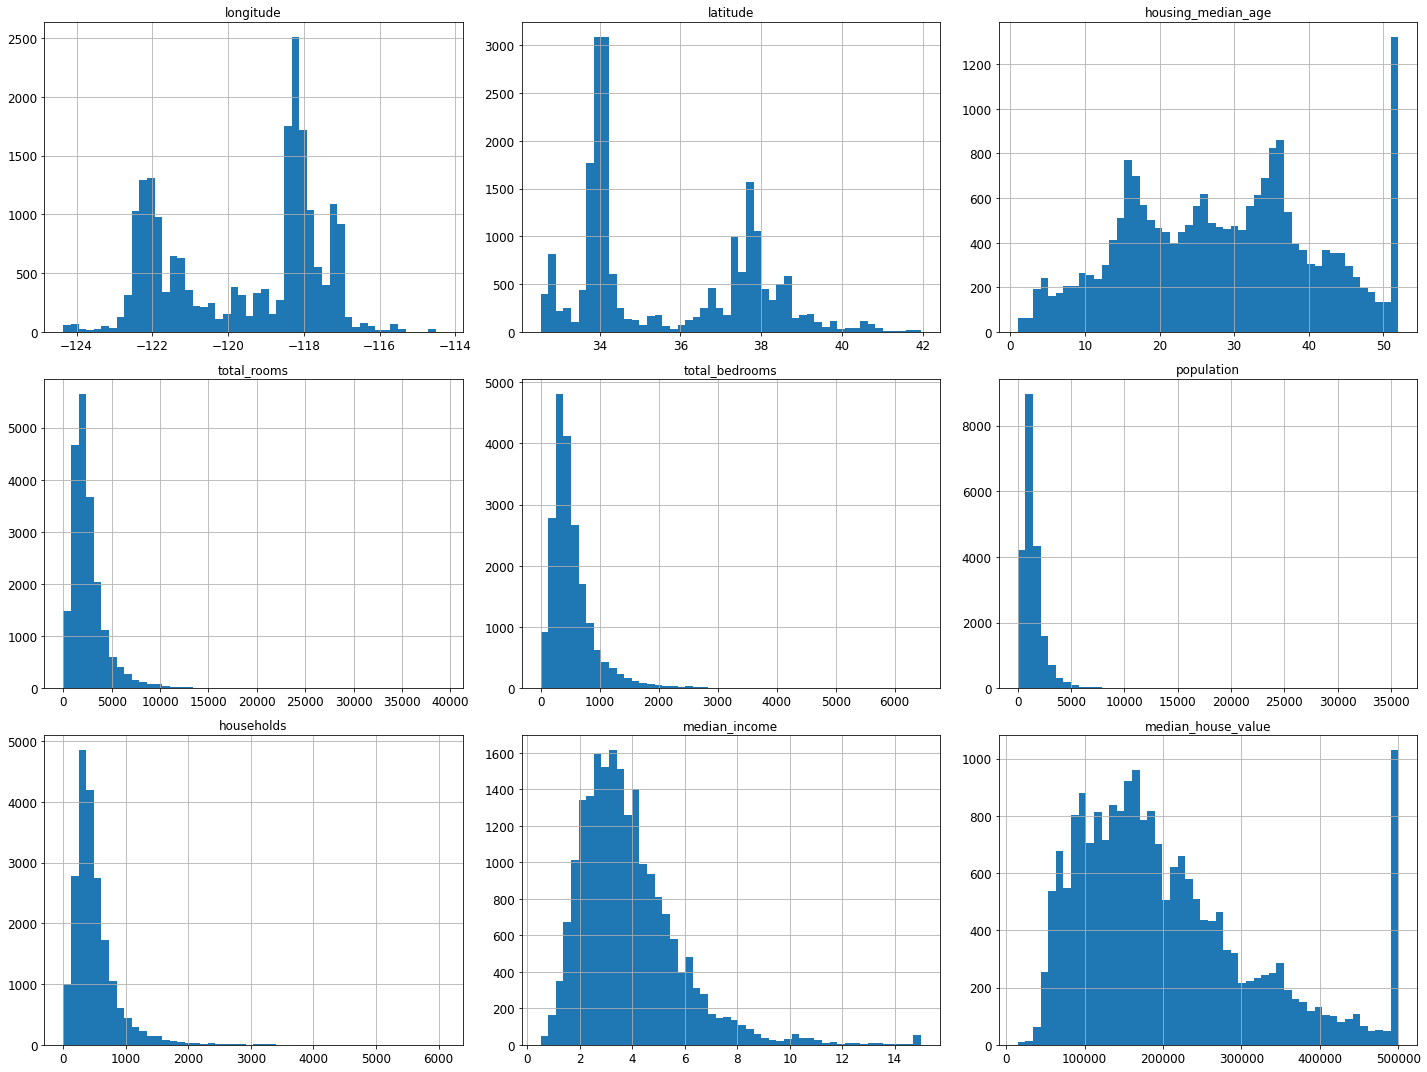

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()        # 안쳐도 그래프 출력됨, 주피터노트북에선 선택사항

# 테스트 세트 만들기

In [6]:
import numpy as np

np.random.seed(42)    # 실행결과 동일하게 맞춤

def split_train_test(data, test_ratio):                     # train데이터, test데이터 나누는 알고리즘
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(housing, 0.2)    
len(train_set)

16512

In [8]:
len(test_set)

4128

In [9]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# 각 샘플마다 식별자의 해시값을 계산해 해시 최갯값의 20%보다 작거나 같은 샘플만 테스트셋으로 보내는 알고리즘
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] 

In [10]:
housing_with_id = housing.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [11]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [12]:
from sklearn.model_selection import train_test_split
# random_state로 초기값 지정
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [13]:
# 소득구간에 따라 소득 카테고리 형성
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1,2,3,4,5])

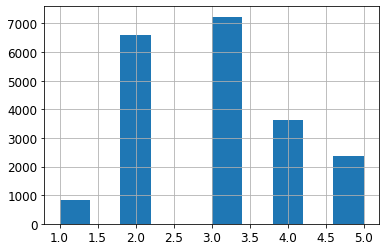

In [15]:
housing.income_cat.hist();

In [20]:
# 소득 카테고리 기반 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
# 소득 카테고리별 비율
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [22]:
# 소득수준별 차지하는 비율
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [18]:
# 특성 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# 데이터 이해를 위한 탐색과 시각화

In [23]:
housing = strat_train_set.copy()

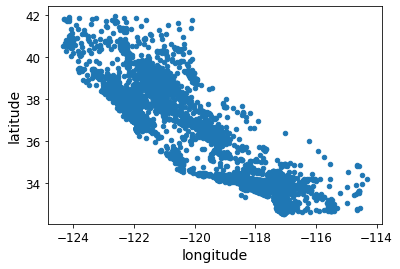

In [24]:
# 위도와 경도 기반 지리적 데이터 시각화
housing.plot(kind='scatter', x='longitude', y='latitude');

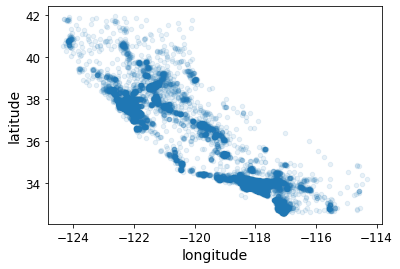

In [25]:
# 밀집된 영역을 확인하기 위해 알파값 부여
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

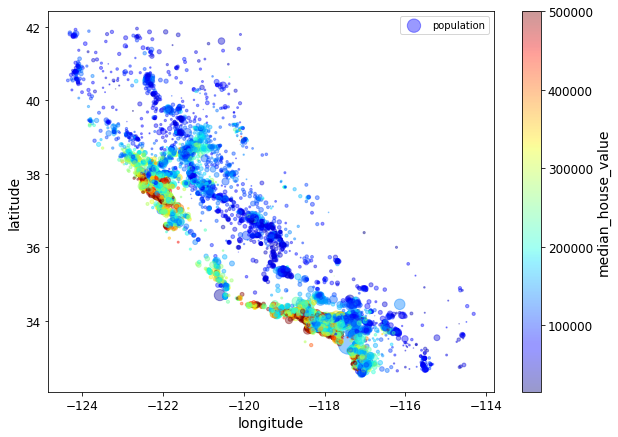

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,      # c(color), s(size)
             sharex=False)
plt.legend();

In [27]:
# 캘리포니아 이미지 다운로드

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x267712f2190>)

그림 저장: california_housing_prices_plot


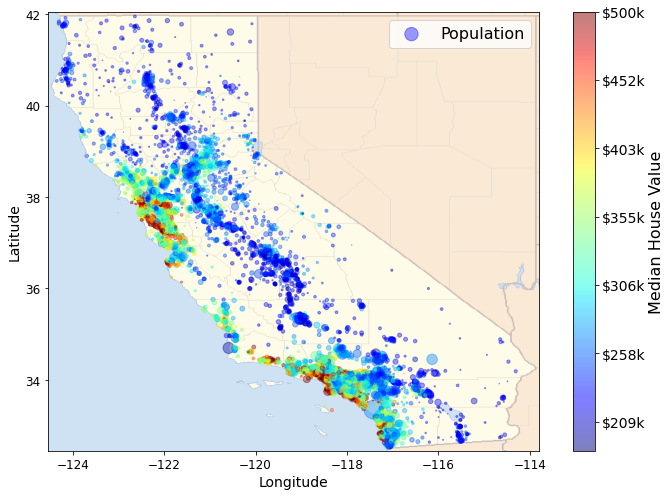

In [28]:
# 캘리포니아 지도 위에 시각화
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

# 상관관계 조사

In [29]:
# 표준 상관계수
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

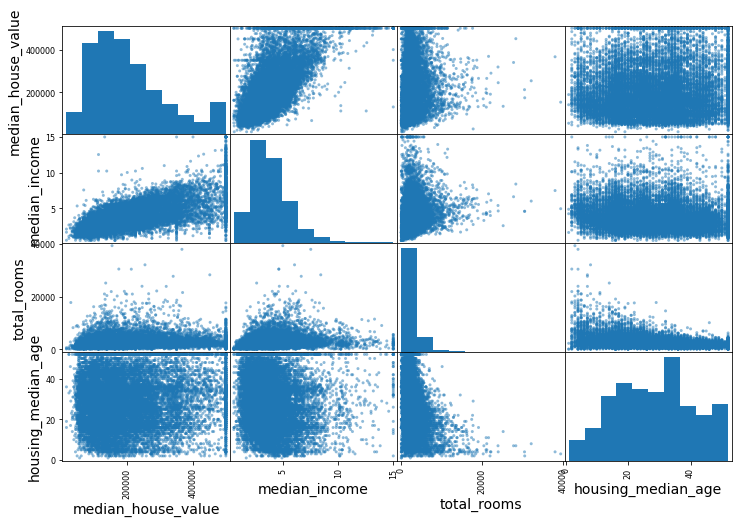

In [30]:
# pandas 함수 활용한 상관계수
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8));            # attributes에 대해 한번에 상관관계를 파악하는 그래프 생성

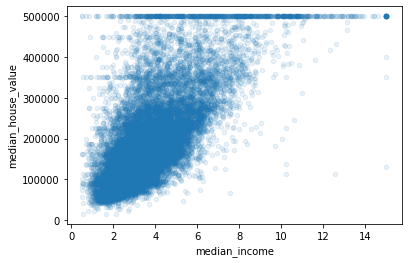

In [82]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);
# 매우 강한 상관관계, 가격 상한값 500000에서 수평선으로 보임 -> 상한값 데이터 제거 필요

# 특성 조합으로 실험

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [34]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

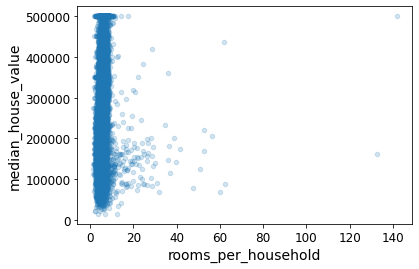

In [35]:
housing.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2);

# 머신러닝 알고리즘을 위한 데이터 준비

In [36]:
housing = strat_train_set.drop('median_house_value', axis=1)     # 훈련세트 X
housing_labels = strat_train_set.median_house_value.copy()       # 훈련세트 y

In [86]:
# 데이터 정제 방법
# housing.dropna(subset=['total_bedrooms'])        # 결측치를 제거
# housing.drop('total_bedrooms', axis=1)           # 결측치가 있는 컬럼을 제거
# median = housing.total_bedrooms.median()         # 결측치를 중앙값으로 대체
# housing['total_bedrooms'].fillna(median, inplace=True)

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')         # 중앙값으로 대체

In [38]:
# 중앙값이 수치형 특성에만 계산될 수 있으므로 텍스트 특성을 제외한 복사본
housing_num = housing.drop('ocean_proximity', axis=1)

In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_     # 각 특성의 중간값을 statistics_ 에 저장

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [41]:
housing_num.median().values       # 위의 결과와 일치

C:\Users\ytnal\AppData\Local\Temp/ipykernel_30156/3544479537.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values       # 위의 결과와 일치


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
X = imputer.transform(housing_num)

In [43]:
# 훈련세트
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [44]:
# 텍스트와 범주형 특성
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


# 텍스트와 범주형 특성 다루기

In [45]:
# 텍스트를 숫자로 변환하는 인코더 활용
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]    

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
# ordinal encoder의 단점 - 머신러닝 알고리즘이 두 값이 가까이 있을수록 비슷하다고 판단
# => 한 특성만 1이고 나머지는 0이 되는 onehotvector로 바꾸는 인코더 활용
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
# OneHotEncoder는 기본적으로 scipy 희소행렬로 반환
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 추가 특성을 위한 사용자 정의 변환기

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 안함
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [52]:
# 숫자 특성 변환 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
# 범주형 컬럼과 수치형 컬럼을 각각 다룰 필요 없이 하나의 변환기로 처리하는 방법
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

# 모델 선택과 훈련

In [54]:
# 훈련세트에서 훈련하고 평가
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('예측:', lin_reg.predict(some_data_prepared))
print('레이블:', list(some_labels))

예측: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
레이블: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [56]:
# RMSE 측정
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse         # 너무 값이 큼(과소적합 상태)

68376.51254853733

In [57]:
# DecisionTreeRegressor 적용
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse       # 0? 과대적합 됨

0.0

# 교차 검증을 사용한 평가

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [62]:
def display_scores(scores):
    print('점수:', scores)
    print('평균:', scores.mean())
    print('표준편차:', scores.std())

display_scores(tree_rmse_scores)

점수: [73811.8567665  71450.96541176 68945.17753575 70816.65243388
 69117.12415019 75639.68479803 70698.61267012 74407.14563414
 68114.04234923 71312.22563099]
평균: 71431.3487380606
표준편차: 2360.144301131972


In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)         # 값이 작을수록 좋은 것

점수: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
평균: 68897.63006613276
표준편차: 3002.746127534864


In [64]:
# RandomForestRegressor 모델
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18755.187435521133

In [66]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [51169.45774711 49193.89462109 47075.48152733 51880.98457634
 46958.72776068 51748.5550159  52909.20391665 49345.34357855
 48087.82356965 54087.47757244]
평균: 50245.69498857371
표준편차: 2346.64449471039


In [67]:
# SVR
from sklearn.svm import SVR
svm_reg = SVR()
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118451.153930123

In [129]:
# R에서 Rdata 비슷하게 모델 만든 것 저장 가능
# import joblib

# joblib.dump(my_model, 'my_model.pkl')

# my_model_loaded = joblib.load('my_model.pkl')

# 모델 세부 튜닝

## 그리드 탐색

In [68]:
# 여러가지 하이퍼파라미터 조합별로 전체를 돌려줌
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  # 각 경우별로 넣은 하이퍼파라미터들의 조합
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [131]:
grid_search.best_params_           # 모든 조합중에 가장 좋은 조합

{'max_features': 6, 'n_estimators': 30}

In [132]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [133]:
# 조합별 평가점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64061.6311468952 {'max_features': 2, 'n_estimators': 3}
55394.99696523147 {'max_features': 2, 'n_estimators': 10}
52607.524472882425 {'max_features': 2, 'n_estimators': 30}
60003.59055485715 {'max_features': 4, 'n_estimators': 3}
52467.98596354531 {'max_features': 4, 'n_estimators': 10}
50421.13309225513 {'max_features': 4, 'n_estimators': 30}
59488.079501304936 {'max_features': 6, 'n_estimators': 3}
52709.412283680686 {'max_features': 6, 'n_estimators': 10}
50008.02759495082 {'max_features': 6, 'n_estimators': 30}
58779.417478000585 {'max_features': 8, 'n_estimators': 3}
52192.961521674035 {'max_features': 8, 'n_estimators': 10}
50120.87203905666 {'max_features': 8, 'n_estimators': 30}
62371.18585751308 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54063.28475423777 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60142.15496089144 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52871.48253001494 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## 랜덤 탐색

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000267742881C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026774280370>},
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


## 최상의 모델과 오차분석

In [136]:
# 각 특성의 상대적 중요도
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.96064105e-02, 6.57170819e-02, 4.12062531e-02, 1.66774241e-02,
       1.79068373e-02, 1.75720109e-02, 1.54722150e-02, 3.24839026e-01,
       6.10424286e-02, 1.06925955e-01, 9.12119410e-02, 7.45164938e-03,
       1.45443150e-01, 9.54541207e-05, 3.10994177e-03, 5.72222156e-03])

In [137]:
# 중요도 옆에 특성 이름 표시
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32483902639737255, 'median_income'),
 (0.1454431497222988, 'INLAND'),
 (0.10692595474005046, 'pop_per_hhold'),
 (0.0912119409904615, 'bedrooms_per_room'),
 (0.07960641050277333, 'longitude'),
 (0.06571708185115024, 'latitude'),
 (0.061042428621402064, 'rooms_per_hhold'),
 (0.04120625309983672, 'housing_median_age'),
 (0.01790683727135061, 'total_bedrooms'),
 (0.017572010905339927, 'population'),
 (0.016677424113968876, 'total_rooms'),
 (0.015472214950519354, 'households'),
 (0.007451649384942142, '<1H OCEAN'),
 (0.005722221557534972, 'NEAR OCEAN'),
 (0.00310994177029493, 'NEAR BAY'),
 (9.545412070353023e-05, 'ISLAND')]

## 테스트 세트로 시스템 평가하기

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

48548.54491276651

In [73]:
# 테스트 RMSE에 대한 95% 신뢰구간 계산
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,       # 신뢰수준, 자유도, 값, 표준오차 순서
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46610.18523128, 50412.42960817])

# 추가내용

## 전처리와 예측을 포함한 전체 파이프라인

In [74]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('liniear', LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 83811.08312039, 314388.27147935, 145641.85902864, 183704.64921202,
       238729.66725745])

## joblib을 사용한 모델 저장 및 불러오기

In [76]:
my_model = full_pipeline_with_predictor

In [78]:
import joblib
joblib.dump(my_model, 'my_model.pkl')

my_model_loaded = joblib.load('my_model.pkl')